In [1]:
!pip install apyori

Defaulting to user installation because normal site-packages is not writeable


In [144]:
from apyori import apriori

In [145]:
import pandas as pd
import numpy as np


In [146]:
dataset = pd.read_csv("H:\Python\Data Mining\Day_1\Lab_1\Egyptian_Grocery_Transactions.csv", encoding="cp1256" , sep=";")

#'يعني ه encoding="cp1256"؟
#cp1256 = Windows-1256 Arabic Code Page
# 


In [147]:
dataset.columns=['items'] # Rename the frist column with "item"
dataset

,items
0,"فراخ,بطاطس"
1,"رز,فراخ"
2,"عسل,لحمة,رز,زبادي"
3,"بصل,رز,عدس"
4,"شيبسي,فلفل,بيبسي,مياه"
5,"فراخ,بطاطس,شيبسي"
6,"طماطم,عدس,كورن فليكس"
7,"عسل,مربة,زيت,عيش بلدي"
8,"فراخ,مكرونة,شاي,كشري,سكر,سمنة"
9,"عسل,عدس"


In [148]:
# read item values  from dataframe colum
items = dataset['items'].values
items # items is array of item 

array(['فراخ,بطاطس', 'رز,فراخ', 'عسل,لحمة,رز,زبادي', 'بصل,رز,عدس',
       'شيبسي,فلفل,بيبسي,مياه', 'فراخ,بطاطس,شيبسي',
       'طماطم,عدس,كورن فليكس', 'عسل,مربة,زيت,عيش بلدي',
       'فراخ,مكرونة,شاي,كشري,سكر,سمنة', 'عسل,عدس',
       'زيت,بيض,فول,مكرونة,صلصة,جبنة قريش', 'شاي,عدس,عسل,زيت,بيبسي,بيض',
       'رز,عدس,كشري', 'كشري,عيش بلدي', 'لبن,بيبسي,مربة',
       'سكر,عيش بلدي,مكرونة', 'بيبسي,زبادي,طعمية',
       'بيبسي,سكر,زيت,عدس,فول,بيض', 'بيض,بيبسي,طعمية,سكر,سمنة,جبنة قريش'],
      dtype=object)

In [149]:
items[2]

'عسل,لحمة,رز,زبادي'

In [150]:
# split data into lists store it in transactions list, as 1 list is ---> 1 transaction
transactions=[]
for i in range (0, len(items)):
    transactions.append( items[i].split(",") ) #split rows/items as lists

print(transactions)

[['فراخ', 'بطاطس'], ['رز', 'فراخ'], ['عسل', 'لحمة', 'رز', 'زبادي'], ['بصل', 'رز', 'عدس'], ['شيبسي', 'فلفل', 'بيبسي', 'مياه'], ['فراخ', 'بطاطس', 'شيبسي'], ['طماطم', 'عدس', 'كورن فليكس'], ['عسل', 'مربة', 'زيت', 'عيش بلدي'], ['فراخ', 'مكرونة', 'شاي', 'كشري', 'سكر', 'سمنة'], ['عسل', 'عدس'], ['زيت', 'بيض', 'فول', 'مكرونة', 'صلصة', 'جبنة قريش'], ['شاي', 'عدس', 'عسل', 'زيت', 'بيبسي', 'بيض'], ['رز', 'عدس', 'كشري'], ['كشري', 'عيش بلدي'], ['لبن', 'بيبسي', 'مربة'], ['سكر', 'عيش بلدي', 'مكرونة'], ['بيبسي', 'زبادي', 'طعمية'], ['بيبسي', 'سكر', 'زيت', 'عدس', 'فول', 'بيض'], ['بيض', 'بيبسي', 'طعمية', 'سكر', 'سمنة', 'جبنة قريش']]


In [42]:
!pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   --------------- ------------------------ 0.5/1.4 MB 1.1 MB/s eta 0:00:01
   ------------------------------- -------- 1.0/1.4 MB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 1.4 MB/s eta 0:00:00


In [151]:
from mlxtend.preprocessing import TransactionEncoder # OR...from mlxtend.preprocessing import OnehotTransactions
from mlxtend.frequent_patterns import apriori, association_rules

In [152]:
encoder = TransactionEncoder()
new_trans = encoder.fit_transform(transactions)  #encode transaction  

In [153]:
print(new_trans)

[[False  True False False False False False False False False False False
  False False False False False False  True False False False False False
  False False False False]
 [False False False False False  True False False False False False False
  False False False False False False  True False False False False False
  False False False False]
 [False False False False False  True  True False False False False False
  False False False False  True False False False False False False False
   True False False False]
 [ True False False False False  True False False False False False False
  False False False  True False False False False False False False False
  False False False False]
 [False False  True False False False False False False False False  True
  False False False False False False False  True False False False False
  False False False  True]
 [False  True False False False False False False False False False  True
  False False False False False False  True False F

In [154]:
#encoder.columns_ 

In [155]:
# for clear view use Dataframe
Data = pd.DataFrame(data = new_trans, columns = encoder.columns_ , dtype = int)
Data

,بصل,بطاطس,بيبسي,بيض,جبنة قريش,رز,زبادي,زيت,سكر,سمنة,...,فراخ,فلفل,فول,كشري,كورن فليكس,لبن,لحمة,مربة,مكرونة,مياه
0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
5,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,0,0,0,1,1,...,1,0,0,1,0,0,0,0,1,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [156]:
support = apriori( Data, min_support=0.1, use_colnames= True)
support.sort_values(by = 'support', ascending = False)

C:\Users\El-Wattaneya\AppData\Roaming\Python\Python313\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
1,0.315789,(بيبسي)
12,0.315789,(عدس)
4,0.210526,(رز)
6,0.210526,(زيت)
2,0.210526,(بيض)
7,0.210526,(سكر)
13,0.210526,(عسل)
15,0.210526,(فراخ)
27,0.157895,"(زيت, بيض)"
17,0.157895,(كشري)


In [164]:
confidence = association_rules(support, metric='confidence', min_threshold= 0.3)
confidence.sort_values(by = 'confidence', ascending= False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(بطاطس),(فراخ),0.105263,0.210526,0.105263,1.000000,4.750000,1.0,0.083102,inf,0.882353,0.500000,1.000000,0.750000
8,(طعمية),(بيبسي),0.105263,0.315789,0.105263,1.000000,3.166667,1.0,0.072022,inf,0.764706,0.333333,1.000000,0.666667
13,(جبنة قريش),(بيض),0.105263,0.210526,0.105263,1.000000,4.750000,1.0,0.083102,inf,0.882353,0.500000,1.000000,0.750000
21,(فول),(بيض),0.105263,0.210526,0.105263,1.000000,4.750000,1.0,0.083102,inf,0.882353,0.500000,1.000000,0.750000
72,"(زيت, بيض, عدس)",(بيبسي),0.105263,0.315789,0.105263,1.000000,3.166667,1.0,0.072022,inf,0.764706,0.333333,1.000000,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,(بيبسي),"(زيت, عدس)",0.315789,0.105263,0.105263,0.333333,3.166667,1.0,0.072022,1.342105,1.000000,0.333333,0.254902,0.666667
65,(عدس),"(زيت, بيض)",0.315789,0.157895,0.105263,0.333333,2.111111,1.0,0.055402,1.263158,0.769231,0.285714,0.208333,0.500000
58,(عدس),"(زيت, بيبسي)",0.315789,0.105263,0.105263,0.333333,3.166667,1.0,0.072022,1.342105,1.000000,0.333333,0.254902,0.666667
84,(عدس),"(زيت, بيض, بيبسي)",0.315789,0.105263,0.105263,0.333333,3.166667,1.0,0.072022,1.342105,1.000000,0.333333,0.254902,0.666667


In [73]:
confidence = association_rules(support, metric='confidence', min_threshold= 0.4)
confidence.sort_values(by = 'confidence', ascending= False).head(2)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(بطاطس),(فراخ),0.105263,0.210526,0.105263,1.0,4.75,1.0,0.083102,inf,0.882353,0.5,1.0,0.75
15,(فول),(بيض),0.105263,0.210526,0.105263,1.0,4.75,1.0,0.083102,inf,0.882353,0.5,1.0,0.75


### 2 strong rule

In [158]:
lift = association_rules(support, metric='lift', min_threshold= 0.4)
lift.sort_values(by = 'lift', ascending= False).head(4)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
78,"(زيت, بيبسي)","(بيض, عدس)",0.105263,0.105263,0.105263,1.0,9.500000,1.0,0.094183,inf,1.000000,1.000000,1.0,1.000000
79,"(بيض, عدس)","(زيت, بيبسي)",0.105263,0.105263,0.105263,1.0,9.500000,1.0,0.094183,inf,1.000000,1.000000,1.0,1.000000
77,"(زيت, عدس)","(بيض, بيبسي)",0.105263,0.157895,0.105263,1.0,6.333333,1.0,0.088643,inf,0.941176,0.666667,1.0,0.833333
71,(فول),"(زيت, بيض)",0.105263,0.157895,0.105263,1.0,6.333333,1.0,0.088643,inf,0.941176,0.666667,1.0,0.833333


####  lift= 9.5 <-- استنادا الى قيمة
####  فى عملية شراء البيض والعدس فان العملاء يقوموا بشراء الزيت و البيبسى فى نفس عملية الشراء بنسبة %100
####  lift= 6.3 <-- استنادا الى قيمة
####  فى عملية شراءالزيت والعدس فان العملاء يقوموا بشراء البيض و البيبسى فى نفس عملية الشراء بنسبة %100
#### و بنفس القيم عملية شراء الفول تشمل ايضا شراء الزيت والبيض
#### يرشح وضع منتجات العملية الاولى [البيض و الزيت  و العدس و العدس والبيبسى ] فى ارفف قريبه من بعض وكذالك مع منتجات 

### 2 weak rules

In [135]:
lift = association_rules(support, metric='lift')
lift.sort_values(by = 'lift', ascending= False).tail(2)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
11,(بيبسي),(عدس),0.315789,0.315789,0.105263,0.333333,1.055556,1.0,0.00554,1.026316,0.076923,0.2,0.025641,0.333333
10,(عدس),(بيبسي),0.315789,0.315789,0.105263,0.333333,1.055556,1.0,0.00554,1.026316,0.076923,0.2,0.025641,0.333333


#### there is no week rules 
#### lift =1.05 greater than 1


## visualize

In [113]:
!pip install python-bidi arabic-reshaper

Defaulting to user installation because normal site-packages is not writeable

   ---------------------------------------- 0/2 [python-bidi]
   ---------------------------------------- 0/2 [python-bidi]
   ---------------------------------------- 0/2 [python-bidi]
   ---------------------------------------- 0/2 [python-bidi]
   ---------------------------------------- 0/2 [python-bidi]
   -------------------- ------------------- 1/2 [arabic-reshaper]
   ---------------------------------------- 2/2 [arabic-reshaper]



  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [159]:
import arabic_reshaper
from bidi.algorithm import get_display

import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to reshape Arabic text
def reshape_arabic(text):
    # This reshapes the characters
    reshaped_text = arabic_reshaper.reshape(text)
    # This handles the direction (right-to-left)
    bidi_text = get_display(reshaped_text)
    return bidi_text


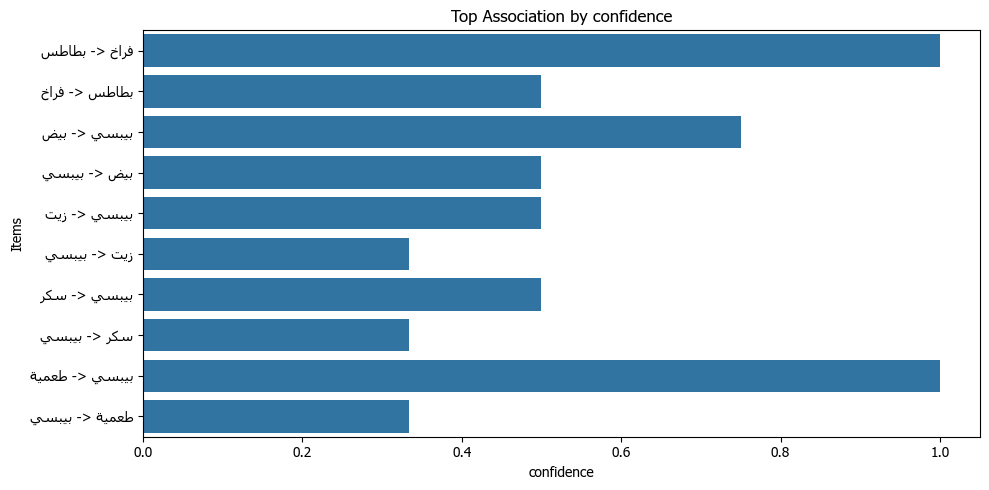

In [182]:
confidence = association_rules(support, metric='confidence', min_threshold= 0.3)
top_rules = confidence.head(10).copy()

# Create a 'Confidence' column with correctly shaped Arabic text
top_rules['Confidence'] = top_rules.apply(
    lambda row: f"{reshape_arabic(' , '.join(list(row['antecedents'])))} -> {reshape_arabic(' , '.join(list(row['consequents'])))}",
    axis=1
)
# Now you can plot the data
plt.figure(figsize=(10, 5))
sns.barplot(x='confidence', y='Confidence', data=top_rules)
plt.title('Top Association by confidence')
plt.xlabel('confidence')
plt.ylabel('Items')
plt.tight_layout()
plt.show()